In [2]:
import pandas as pd
import numpy as np 
import os
import tifffile as tiff
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.color import label2rgb
from skimage import io, img_as_float
import matplotlib.pyplot as plt
from PIL import Image
import argparse

In [3]:
trial_img=r"d:\MIBI-TOFF\Data_For_Amos\FOV4\TIFs\CD4.tif"
import os
import csv
import numpy as np

# Define the directory containing the FOV files
data_dir = r"d:\MIBI-TOFF\Data_For_Amos"

# Define the markers to look for
markers = ["CD4", "CD45", "MelanA", "COL1A1"]

output_file = "expression_values.csv"


with open(output_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["FOV", "Expression", "Min", "Median", "Max"])  # header row

  
    for fov_dir in os.listdir(data_dir):
        print(fov_dir)
        fov_path = os.path.join(data_dir, fov_dir)
        
        if os.path.isdir(fov_path):
            print(f"Processing FOV: {fov_dir}")
       
            for marker in markers:
              
                file_path = os.path.join(fov_path,"TIFs", f"{marker}.tif")
                if os.path.exists(file_path):
                    print(f"Processing {marker}...")
                 
                    with tiff.TiffFile(file_path) as tif:
                        image = tif.asarray()
                 
                    non_zero_image = image[image != 0]
                    if non_zero_image.size > 0:
                        min_val = np.min(non_zero_image)
                        median_val = np.median(non_zero_image)
                        max_val = np.max(non_zero_image)
                    else:
                        min_val = 0
                        median_val = 0
                        max_val = 0
                   
                    writer.writerow([fov_dir, marker, min_val, median_val, max_val])
                else:
                    print(f"File not found: {file_path}")

print(f"Output written to {output_file}")


.RDataTmp
.Rhistory
Channels.xlsx
classification_for_mantis_12_01_23.csv
cleaned_expression_with_both_classification_prob_spatial_30_08_24.csv
Data_Summary.csv
Data_Summary.xlsx
expression_18_01_23.csv
FOV10
Processing FOV: FOV10
Processing CD4...
Processing CD45...
Processing MelanA...
Processing COL1A1...
FOV100
Processing FOV: FOV100
Processing CD4...
Processing CD45...
Processing MelanA...
Processing COL1A1...
FOV102
Processing FOV: FOV102
Processing CD4...
Processing CD45...
Processing MelanA...
Processing COL1A1...
FOV104
Processing FOV: FOV104
Processing CD4...
Processing CD45...
Processing MelanA...
Processing COL1A1...
FOV106
Processing FOV: FOV106
Processing CD4...
Processing CD45...
Processing MelanA...
Processing COL1A1...
FOV108
Processing FOV: FOV108
Processing CD4...
Processing CD45...
Processing MelanA...
Processing COL1A1...
FOV110
Processing FOV: FOV110
Processing CD4...
Processing CD45...
Processing MelanA...
Processing COL1A1...
FOV112
Processing FOV: FOV112
Process

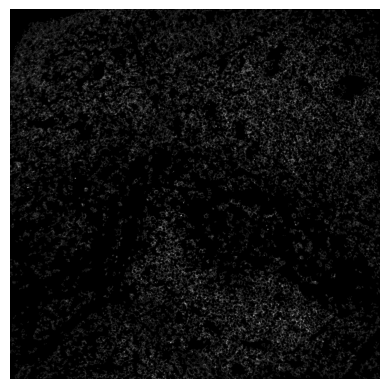

Value: 0, Count: 3521533
Value: 1, Count: 467654
Value: 2, Count: 146765
Value: 3, Count: 41801
Value: 4, Count: 11754
Value: 5, Count: 3347
Value: 6, Count: 990
Value: 7, Count: 315
Value: 8, Count: 95
Value: 9, Count: 25
Value: 10, Count: 6
Value: 11, Count: 7
Value: 12, Count: 2
Value: 13, Count: 2
Value: 14, Count: 1
Value: 15, Count: 2
Value: 16, Count: 2
Value: 18, Count: 1
Value: 24, Count: 1
Value: 28, Count: 1


In [4]:
trial_img=r"d:\MIBI-TOFF\Data_For_Amos\FOV4\TIFs\CD4.tif"


file_ext = os.path.splitext(trial_img)[1].lower()

if file_ext in ['.tiff', '.tif']:
    with tiff.TiffFile(trial_img) as tif:
        image = tif.asarray()
elif file_ext in ['.jpg', '.jpeg']:
    # Load as a JPEG
    image = np.array(Image.open(trial_img))
    print("Loaded as JPEG.")
else:
    print("Unsupported file format.")


plt.imshow(image,cmap='gray',vmin=0,vmax=5)
plt.axis('off')
plt.show()
unique_values, counts = np.unique(image,return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")


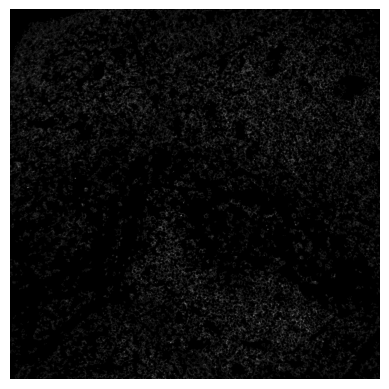

Value: 0.0, Count: 3521533
Value: 0.03571428571428571, Count: 467654
Value: 0.07142857142857142, Count: 146765
Value: 0.10714285714285714, Count: 41801
Value: 0.14285714285714285, Count: 11754
Value: 0.17857142857142858, Count: 3347
Value: 0.21428571428571427, Count: 990
Value: 0.25, Count: 315
Value: 0.2857142857142857, Count: 95
Value: 0.32142857142857145, Count: 25
Value: 0.35714285714285715, Count: 6
Value: 0.39285714285714285, Count: 7
Value: 0.42857142857142855, Count: 2
Value: 0.4642857142857143, Count: 2
Value: 0.5, Count: 1
Value: 0.5357142857142857, Count: 2
Value: 0.5714285714285714, Count: 2
Value: 0.6428571428571429, Count: 1
Value: 0.8571428571428571, Count: 1
Value: 1.0, Count: 1


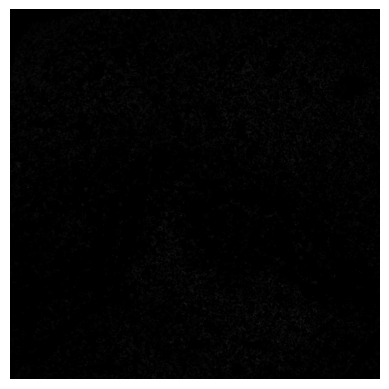

In [9]:

image_float = img_as_float(image)
image_eq = (image_float - image_float.min()) / (image_float.max() - image_float.min())



plt.imshow(image_eq,cmap='gray',vmin=0,vmax=0.25)
plt.axis('off')
plt.show()

unique_values, counts = np.unique(image_eq,return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")

# Replicate the image to create three channels
image_rgb = np.stack((image_eq,) * 3, axis=-1)
plt.imshow(image_rgb, vmin=0, vmax=0.25)
plt.axis('off')
plt.show()



In [6]:
def LMGraph(rgb_image,superpix_number, m_id,cas,large_image,reg_coords,level):

  case_features = []
  case_features = pd.DataFrame(case_features)
  case_number0 = 0
  case_number1 = 0
  patch = rgb_image

  segments_slic = slic(patch, n_segments=superpix_number, compactness=10, sigma=0.8, convert2lab=1,start_label=1)#compactness 10 reference !felzenszwalb(patch, scale=500, sigma=0.5, min_size=50)
  out = color.label2rgb(segments_slic, patch, kind='avg', bg_label=0)

  # plt.imshow(mark_boundaries(patch, segments_slic, color=(0,0,1)))
  # plt.show()
  g = graph.rag_mean_color(patch, segments_slic)
  labels2 = graph.cut_threshold(segments_slic, g,12)# stable with (segments_slic, g,12)
  out1 = color.label2rgb(labels2, out, kind='avg', bg_label=0)


  print('after cut threshold')

  # plt.imshow(mark_boundaries(patch, labels2, color=(0,0,1)))
  # plt.show()
  g = graph.rag_mean_color(patch, segments_slic,mode='similarity')
  labels2 = graph.cut_normalized(segments_slic, g,thresh = 0.055,num_cuts=100)  #stable with (segments_slic, g,thresh = 0.08,num_cuts=9)
  out2 = color.label2rgb(labels2, patch, kind='avg', bg_label=1)



  ## plt.imshow(mark_boundaries(patch, labels2, color=(0,0,1)))
  ## plt.show()
  ## plt.imshow(mark_boundaries(out2, labels2, color=(0,0,1)))
  ## plt.show()


  regions = regionprops(labels2)
  print('Superpixel number:',len(regions))

  coor = []
  coor = np.array(coor)
  node_coor =[]
  node_coor = pd.DataFrame(node_coor)
  coor = regions[0].centroid
  coor = np.array(coor)
  coor = np.reshape(coor,(1,2))
  #print('Shape:',np.shape(coor))
  G = nx.Graph()
  n =0
  for props in regions:
    #print('LMGraph props.bbox_area:',props.bbox_area,props.bbox)
    if props.bbox_area > 8000:
      y0, x0 = props.centroid
      x0=int(x0)
      coor = np.append(coor,[[x0,int(y0)]],axis=0)
      spMask = build_spmask(np.shape(patch)[0:2],props.coords)
      spMask = cv2.threshold(spMask, 100, 255, cv2.THRESH_BINARY)[1]

      # plt.imshow(spMask)
      # plt.show()
      # fig, ax = plt.subplots()
      # ax.imshow(spMask, cmap=plt.cm.gray)
      minr, minc, maxr, maxc = props.bbox
      bx = (minc, maxc, maxc, minc, minc)
      by = (minr, minr, maxr, maxr, minr)
      # ax.plot(bx, by, '-b', linewidth=5.5)
      # plt.show()
      spMask_patch = spMask[minr:maxr,minc:maxc]
      # plt.imshow(spMask_patch)
      # plt.show()

      result1 = patch.copy()
      result1[spMask == 0] = 0
      result1[spMask != 0] = patch[spMask != 0]
      #print(np.shape(spMask),np.shape(patch[:,:,1]))
      # plt.imshow( result1)
      # plt.show()
      ####np.save(cas+'/',result1)
      #coor = np.append(coor,y0)
      # node_coor = node_coor.append(pd.DataFrame(coor))
      G.add_node(n,pos=(x0,int(y0)))
      #print(n,x0,int(y0))
      n=n+1
      print('Upsampling superpixel to 10x', props.bbox)
      cluster_size = HMGraph(image_path,reg_coords,props.bbox,spMask_patch)
      print('XXXXXXXXXXXX',np.shape(cluster_size))
      cluster_size = np.reshape(cluster_size,(1,len(cluster_size)))

      print('XXXXXXXXXXXX',np.shape(cluster_size),cluster_size)
      cluster0_size = cluster_size[0,0]
      cluster1_size = cluster_size[0,1]
      if (cluster_size[0,0] != 0) and (cluster_size[0,1] != 0):
        case_features = pd.concat([case_features,pd.DataFrame(cluster_size)])

      case_number0 = case_number0 +cluster0_size
      case_number1 = case_number1 +cluster1_size
      print('Case features:',case_features)

  print('-------------> saving node coordinates')
  node_coor = pd.concat([node_coor,pd.DataFrame(coor[1:])])
  #print('---', node_coor)
  print('..............Saving node centroids')

  #all_nodes, grp = graph_def(label_image[:,:,1], out)
  pos = nx.get_node_attributes(G, "pos")
  #print('...............................>',pos)
  triangulation = scipy.spatial.Delaunay(node_coor)
  threshold = 100
  for i, j, k in triangulation.simplices:
      #print([(i, j), (j, k), (k, i)])
      for a, b in [(i, j), (j, k), (k, i)]:
          #print('xxxx',a,b)
          p1 = node_coor.iloc[a]
          p2 = node_coor.iloc[b]
          distance = math.dist(p1, p2)
          #print(p1,p2,'_____________',distance)
          if distance < threshold:
              G.add_edge(a, b)
  ## plt.imshow(patch)
  ## nx.draw_networkx(G, pos,node_shape = 's',node_size=30, font_size=6)
  ## plt.show()

  pos = nx.get_node_attributes(G, "pos")


  print('Extracting features...............')
  #print(np.mean(G.degree(weight='weight')))
  #d = G.degree(weight='weight')
  #a = nx.pagerank(G, weight='weight')
  #b = nx.betweenness_centrality(G, weight='weight')
  #print(list(dict(d).values()))
  #print(np.mean(list(a.values())))
  #print(np.shape(np.mean(G.degree(weight='weight'))),np.shape(np.mean(list(a.values()))),np.shape(np.mean(list(b.values()))))
  #features = [np.mean(list(dict(a).values())),np.std(list(dict(a).values())),kurtosis(list(dict(a).values()),axis=0, bias=True),skew(list(dict(a).values()),axis=0, bias=True)]
  print('------------------00000',case_number0,case_number1,'000000000-----------------------')
  return (case_features)

(2048, 2048, 3)
Value: 0.0, Count: 130944
Value: 0.0001649974729011585, Count: 174678
Value: 0.00020235293170135524, Count: 212853
Value: 0.0004962729596798844, Count: 246768
Value: 0.0008869454910111256, Count: 270954
Value: 0.0010092826061143666, Count: 122718
Value: 0.0018198987824556256, Count: 163608
Value: 0.002180986867355282, Count: 128415
Value: 0.002808426010984501, Count: 87708
Value: 0.00324997679048513, Count: 332376
Value: 0.003719487370116651, Count: 338958
Value: 0.003929088349103512, Count: 217635
Value: 0.00396227544218637, Count: 408207
Value: 0.004668066237827812, Count: 446055
Value: 0.009001816892869973, Count: 3330411
Value: 0.009047790555083911, Count: 1249425
Value: 0.011283816432466167, Count: 4721199


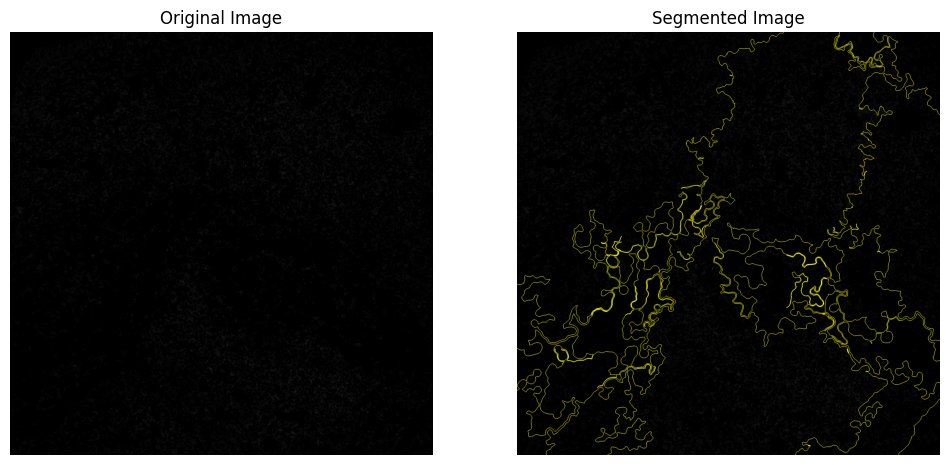

In [17]:
from skimage.segmentation import mark_boundaries
segments = slic(image_eq, n_segments=200, compactness=0.0001, sigma=8,channel_axis=None)
segmented_image = label2rgb(segments, image_eq, kind='avg', bg_label=0)  # Setting bg_label to 0 if you want to ignore background
print(segmented_image.shape)
unique_values, counts = np.unique(segmented_image,return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")



plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_eq, cmap='gray',vmin=0,vmax=1)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(image_eq,segments),vmin=0,vmax=0.05)
plt.title('Segmented Image')
plt.axis('off')

plt.show()


(2048, 2048, 3, 3)
Value: 0.0, Count: 392832
Value: 0.00016499747290115853, Count: 524034
Value: 0.00020235293170135524, Count: 638559
Value: 0.0004962729596798845, Count: 740304
Value: 0.0008869454910111258, Count: 812862
Value: 0.0010092826061143668, Count: 368154
Value: 0.0018198987824556254, Count: 490824
Value: 0.002180986867355282, Count: 385245
Value: 0.002808426010984501, Count: 263124
Value: 0.003249976790485131, Count: 997128
Value: 0.003719487370116653, Count: 1016874
Value: 0.003929088349103512, Count: 652905
Value: 0.0039622754421863695, Count: 1224621
Value: 0.004668066237827813, Count: 1338165
Value: 0.009001816892869987, Count: 9991233
Value: 0.009047790555083911, Count: 3748275
Value: 0.011283816432466166, Count: 14163597
(2048, 2048, 3)


ValueError: NumPy boolean array indexing assignment cannot assign 3 input values to the 268776 output values where the mask is true

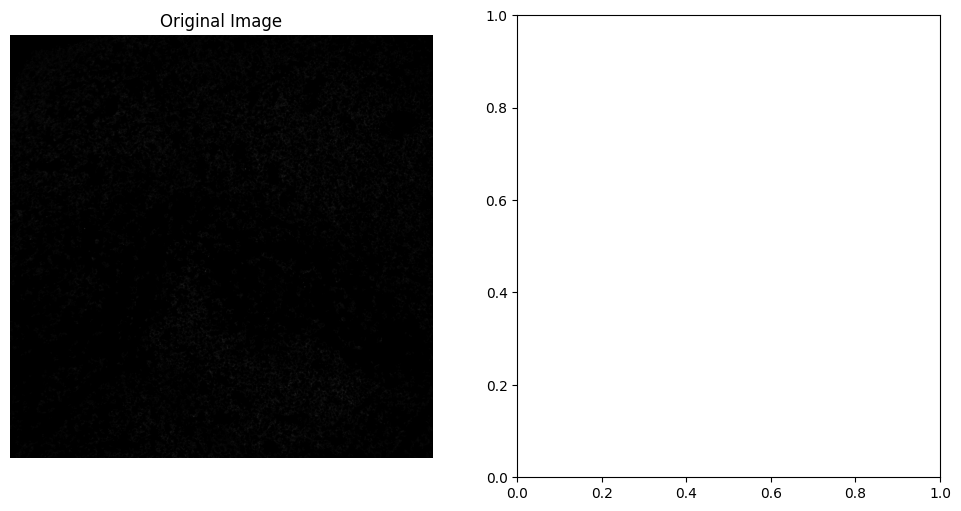

In [15]:
from skimage.segmentation import mark_boundaries
segments = slic(image_rgb, n_segments=200, compactness=0.0001, sigma=8,channel_axis=None)
segmented_image = label2rgb(segments, image_rgb, kind='avg', bg_label=0)  # Setting bg_label to 0 if you want to ignore background
print(segmented_image.shape)
unique_values, counts = np.unique(segmented_image,return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")

print(segments.shape)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_eq, cmap='gray',vmin=0,vmax=1)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(image_rgb,segments),vmin=0,vmax=0.05)
plt.title('Segmented Image')
plt.axis('off')

plt.show()